In [2]:
import numpy as np
import cv2 as cv
import os
import pandas as pd
import matplotlib.pyplot as plt

ia=[]
IMG_DIR='/content/drive/MyDrive/Tabulators-dataset/Dataset/bad' # path to the data set
for img in os.listdir(IMG_DIR):
  img_array=cv.imread(os.path.join(IMG_DIR,img), cv.IMREAD_GRAYSCALE) # the image is converted into greyscale
  ia.append(img_array)
print(ia)  
ia[1].shape
    #img_array=(img_array.flatten())
    #img_array=img_array.reshape(-1,1).T/255 # Each pixel value ranges from 0-255 
    #imv=cv.imshow('img',img_array)
   #plt.imshow(img_array, cmap='gray') 
   #plt.show
   #print(img_array)
  # with open('imgshoulder.csv','ab' ) as f:
        #np.savetxt(f, img_array, delimiter=',')

[array([[228, 136, 121, ..., 137, 140, 118],
       [235, 172, 182, ..., 134, 137, 124],
       [241, 217, 237, ..., 136, 139, 142],
       ...,
       [ 98, 101, 107, ..., 172, 243, 158],
       [ 70,  89, 110, ..., 174, 247, 155],
       [ 61,  75,  84, ..., 165, 243, 154]], dtype=uint8), array([[111, 103, 105, ..., 129, 120, 127],
       [122, 129, 140, ..., 126, 139, 144],
       [185, 238, 244, ..., 148, 218, 236],
       ...,
       [214, 126, 175, ..., 196, 227, 194],
       [124, 109, 123, ..., 231, 167, 133],
       [117, 105, 105, ..., 160, 119, 119]], dtype=uint8), array([[128, 122, 129, ..., 214, 255, 255],
       [131, 146, 167, ..., 213, 255, 255],
       [149, 230, 220, ..., 219, 255, 255],
       ...,
       [230, 156,  79, ..., 147, 255, 255],
       [236, 149,  66, ..., 144, 255, 255],
       [235, 151,  73, ..., 163, 255, 255]], dtype=uint8), array([[190, 198, 162, ..., 169, 137, 254],
       [198, 152,  85, ..., 153, 138, 255],
       [208, 132,  64, ..., 111,  78, 

(178, 26)

In [2]:
"""
Laplacian Filter : remove the speckle noise of the image 
Laplacian
no_Lnoise=[]
for i in range(len(ia)):
  blur=cv.Laplacian(ia[i], cv.CV_64F)
  no_Lnoise.append(blur)
no_Lnoise
plt.imshow(no_Lnoise[0])
print(no_Lnoise[0])
"""

'\nLaplacian Filter : remove the speckle noise of the image \nLaplacian\nno_Lnoise=[]\nfor i in range(len(ia)):\n  blur=cv.Laplacian(ia[i], cv.CV_64F)\n  no_Lnoise.append(blur)\nno_Lnoise\nplt.imshow(no_Lnoise[0])\nprint(no_Lnoise[0])\n'

In [3]:
np.size((ia[0]))
len(ia)

53

In [4]:
"""
# Auqntiwqtion of the images at 64 colors
from skimage import io
from sklearn.cluster import KMeans
colors=32
# Normalization each of the image because 
resB=[]
for i in range(len(ia)):
  resB.append(ia[i]/255)
imgBT=[]
for i in range(len(ia)):
  (imgBT[i]).shuffle(resB[i], random_state=0)[:10000]
  kmeans=KMeans(n_clusters=%colors, random_state=0).fit(imgBT)
"""




'\n# Auqntiwqtion of the images at 64 colors\nfrom skimage import io\nfrom sklearn.cluster import KMeans\ncolors=32\n# Normalization each of the image because \nresB=[]\nfor i in range(len(ia)):\n  resB.append(ia[i]/255)\nimgBT=[]\nfor i in range(len(ia)):\n  (imgBT[i]).shuffle(resB[i], random_state=0)[:10000]\n  kmeans=KMeans(n_clusters=%colors, random_state=0).fit(imgBT)\n'

In [29]:
import numpy as np
from skimage import io, color, img_as_ubyte
from skimage.feature import greycomatrix, greycoprops
from sklearn.metrics.cluster import entropy

#rgbImg = io.imread('https://i.stack.imgur.com/1xDvJ.jpg')
#grayImg = img_as_ubyte(color.rgb2gray(rgbImg))

#distances = [1, 2, 3]
#angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]

distance=[1]
angle=[0, np.pi/4, np.pi/2, 3*np.pi/4]
properties = ['contrast','energy', 'dissimilarity', 'homogeneity']
Features=[]
for i in range(53):
  glcm = greycomatrix(ia[i], 
                    distances=distance, 
                    angles=angle,
                    symmetric=True,
                    normed=True)
  feats= np.hstack([greycoprops(glcm, prop).ravel() for prop in properties])
  Features.append(feats)
print(Features)

[array([1.55404005e+03, 2.70984999e+03, 1.34425359e+03, 2.72794433e+03,
       1.46172812e-02, 1.29694022e-02, 1.42610415e-02, 1.29432278e-02,
       2.58673611e+01, 3.94111344e+01, 2.35963612e+01, 3.90577685e+01,
       7.47161284e-02, 4.01886668e-02, 8.58257352e-02, 3.80056092e-02]), array([1.48357371e+03, 2.88988407e+03, 1.73000739e+03, 2.96208158e+03,
       2.25089582e-02, 1.65867085e-02, 1.73306992e-02, 1.66581420e-02,
       2.45921348e+01, 4.07369492e+01, 2.88826597e+01, 4.14555932e+01,
       9.56087490e-02, 4.39413180e-02, 6.89882865e-02, 4.51788341e-02]), array([1.20521770e+03, 2.63155006e+03, 1.65080569e+03, 2.68096902e+03,
       4.24609587e-02, 4.19042853e-02, 7.78801394e-02, 4.19135336e-02,
       2.21675862e+01, 3.92786127e+01, 2.78666074e+01, 3.96996532e+01,
       1.09181845e-01, 6.64126945e-02, 1.25325730e-01, 6.56396445e-02]), array([1.89605979e+03, 2.26408952e+03, 6.30247863e+02, 2.43424656e+03,
       1.38035284e-02, 1.29126548e-02, 2.21567710e-02, 1.28813976e-02,

In [30]:
datb=pd.DataFrame(Features)
datb=datb.T
datb

0            1   ...           51           52
0   1554.040046  1483.573708  ...   635.111823   586.512104
1   2709.849988  2889.884068  ...  2758.706349  2409.421348
2   1344.253594  1730.007388  ...  2299.685185  2113.680958
3   2727.944328  2962.081582  ...  2798.254960  2641.633895
4      0.014617     0.022509  ...     0.019142     0.016348
5      0.012969     0.016587  ...     0.017039     0.014384
6      0.014261     0.017331  ...     0.016734     0.014067
7      0.012943     0.016658  ...     0.017111     0.014183
8     25.867361    24.592135  ...    15.321675    15.282433
9     39.411134    40.736949  ...    40.279762    36.061798
10    23.596361    28.882660  ...    35.086111    33.321407
11    39.057768    41.455593  ...    40.229167    38.490949
12     0.074716     0.095609  ...     0.094437     0.092746
13     0.040189     0.043941  ...     0.027791     0.039988
14     0.085826     0.068988  ...     0.041177     0.044378
15     0.038006     0.045179  ...     0.036004     0.033609

[16 rows x 53 columns]

In [31]:
datb.rename(columns={0:'b', 1:'b', 2:'b', 3:'b', 4:'b', 5:'b', 6:'b', 7:'b', 8:'b', 9:'b', 10:'b', 11:'b', 12:'b', 13:'b', 14:'b', 15:'b',16:'b', 17:'b', 18:'b', 19:'b', 20:'b', 21:'b', 22:'b', 23:'b', 24:'b', 25:'b', 26:'b', 27:'b', 28:'b', 29:'b', 30:'b', 31:'b', 32:'b', 33:'b', 34:'b', 35:'b', 36:'b', 37:'b', 38:'b', 39:'b', 40:'b', 41:'b', 42:'b', 43:'b', 44:'b', 45:'b', 46:'b', 47:'b', 48:'b', 49:'b', 50:'b', 51:'b', 52:'b', 53:'e1', 54:'e2', 55:'e3', 56:'e4', 57:'e5', 58:'e6', 59:'e7', 60:'e8', 61:'e9', 62:'e10', 63:'e11', 64:'e12', 65:'e13', 66:'e14', 67:'e15', 68:'e16', 69:'e17', 70:'e18', 71:'e19', 72:'e20', 73:'e21', 74:'e22', 75:'e23', 76:'e24', 77:'e25', 78:'e26', 79:'e27', 80:'e28', 81:'e29', 82:'e30', 83:'e31', 84:'e32', 85:'e33', 86:'e34', 87:'e35', 88:'e36', 89:'e37', 90:'38', 91:'e39', 92:'e40', 93:'e41', 94:'e42', 95:'e43', 96:'e44', 97:'e45', 98:'e46', 99:'e47', 100:'e48', 101:'e49', 102:'e50', 103:'e51', 104:'e52', 105:'e53', 106:'e54',107:'e55', 108:'g1', 109:'g2', 110:'g3', 111:'g4', 112:'g5', 113:'g6', 114:'g7', 115:'g8', 116:'g9', 117:'g10', 118:'g11', 119:'g12', 120:'g13', 121:'g14', 122:'g15', 123:'g16', 124:'g17', 125:'g18', 126:'g19', 127:'g20', 128:'g21', 129:'g22', 130:'g23', 131:'g24', 132:'g25', 133:'g26', 134:'g27', 135:'g28', 136:'g29', 137:'g30', 138:'g31', 139:'g32', 140:'g33', 141:'g34', 142:'g35', 143:'g36', 144:'g37', 145:'g38', 146:'g40', 147:'g41', 148:'g42', 149:'g43', 150:'g44', 151:'g45', 152:'g46', 153:'g46', 154:'g48', 155:'g49', 156:'g50', 157:'g51', 158:'g52'}, inplace=True)
datb

b            b  ...            b            b
0   1554.040046  1483.573708  ...   635.111823   586.512104
1   2709.849988  2889.884068  ...  2758.706349  2409.421348
2   1344.253594  1730.007388  ...  2299.685185  2113.680958
3   2727.944328  2962.081582  ...  2798.254960  2641.633895
4      0.014617     0.022509  ...     0.019142     0.016348
5      0.012969     0.016587  ...     0.017039     0.014384
6      0.014261     0.017331  ...     0.016734     0.014067
7      0.012943     0.016658  ...     0.017111     0.014183
8     25.867361    24.592135  ...    15.321675    15.282433
9     39.411134    40.736949  ...    40.279762    36.061798
10    23.596361    28.882660  ...    35.086111    33.321407
11    39.057768    41.455593  ...    40.229167    38.490949
12     0.074716     0.095609  ...     0.094437     0.092746
13     0.040189     0.043941  ...     0.027791     0.039988
14     0.085826     0.068988  ...     0.041177     0.044378
15     0.038006     0.045179  ...     0.036004     0.033609

[16 rows x 53 columns]

In [32]:
datb=datb.T
datb

0            1            2   ...        13        14        15
b  1554.040046  2709.849988  1344.253594  ...  0.040189  0.085826  0.038006
b  1483.573708  2889.884068  1730.007388  ...  0.043941  0.068988  0.045179
b  1205.217701  2631.550058  1650.805691  ...  0.066413  0.125326  0.065640
b  1896.059789  2264.089524   630.247863  ...  0.044278  0.109617  0.043770
b  1695.679277  3378.114751  1953.319088  ...  0.026958  0.052389  0.032267
b  1668.673778  2890.391508  1529.607864  ...  0.029874  0.079625  0.034281
b  1257.124503  1568.302399   580.318182  ...  0.044643  0.094829  0.051010
b   807.353043   988.398250   460.674279  ...  0.065706  0.106683  0.059144
b   831.861031  1376.274225   747.965116  ...  0.054739  0.097596  0.055230
b  1113.610375  1702.888148   932.286667  ...  0.043164  0.069435  0.043640
b   868.413434  2555.600952  1802.726970  ...  0.030670  0.042327  0.025806
b   609.700280  2369.361529  1817.860945  ...  0.032960  0.035350  0.030497
b  1315.967208  2764.297059  1645.704637  ...  0.029129  0.046541  0.031246
b  1657.719062  3892.180933  2590.502259  ...  0.020917  0.039588  0.019161
b  1295.784314  3631.338972  2520.103768  ...  0.024555  0.042290  0.023702
b  1898.293548  3819.644923  2283.533879  ...  0.022912  0.035158  0.025568
b  1501.421429  3699.279739  2602.411765  ...  0.030727  0.039958  0.026783
b  1162.766543  1542.076091   632.846847  ...  0.050643  0.104114  0.050843
b  1063.576577  2208.775136  1208.475870  ...  0.038496  0.075281  0.035934
b  1523.757302  3067.114144  1944.251294  ...  0.035840  0.064452  0.033098
b  1094.198590  2732.556474  1861.726223  ...  0.041679  0.066015  0.042219
b  1476.240176  2767.044767  1622.581664  ...  0.031756  0.065285  0.030427
b   939.641361  2231.415789  1353.659789  ...  0.036524  0.059795  0.033519
b   706.011899  1194.912813   741.097663  ...  0.053759  0.083975  0.057439
b   826.679825  2106.217813  1303.153228  ...  0.039536  0.070914  0.037336
b  1002.556847  3357.280037  2615.290323  ...  0.020771  0.039115  0.019629
b  1037.337382  2998.971368  2053.419636  ...  0.030820  0.059291  0.031047
b  1156.367425  3259.421875  2307.612413  ...  0.031376  0.045491  0.032322
b  1150.690285  2967.271729  2081.372688  ...  0.035193  0.059167  0.032368
b   858.267408  2456.955275  1684.345966  ...  0.046660  0.063873  0.048359
b   950.257699  2345.586160  1688.500436  ...  0.041294  0.054663  0.036453
b   843.861143  2262.693135  1633.333114  ...  0.041603  0.063962  0.038746
b  1003.955606  2555.673108  1645.992725  ...  0.042922  0.071815  0.047382
b  1399.147570  3353.360947  2101.738412  ...  0.031712  0.051698  0.036364
b  1014.472299  2710.525270  2025.222848  ...  0.025308  0.046325  0.025207
b  1002.296486  2773.856518  2019.143393  ...  0.038666  0.048272  0.035518
b   689.487417  2474.685333  1830.160833  ...  0.032422  0.040300  0.033183
b  1000.013158  2611.328918  1658.067619  ...  0.030983  0.045470  0.031928
b  1012.003470  3174.414365  2370.071823  ...  0.028498  0.036628  0.034336
b   832.298361  2539.504945  1952.272109  ...  0.045235  0.056999  0.043263
b  1205.412178  2971.808739  2187.491508  ...  0.033807  0.047676  0.031935
b   480.874870  1068.408073   863.498760  ...  0.059353  0.073964  0.055971
b   837.634211  2464.193122  1718.460087  ...  0.045322  0.065110  0.049540
b  1268.636829  3301.743104  2240.519937  ...  0.029905  0.044616  0.036402
b  1512.620769  3166.373737  1839.341598  ...  0.029488  0.048720  0.034237
b   947.213033  2839.090136  2272.368563  ...  0.037747  0.045917  0.030428
b   701.017934  2070.091664  1407.618269  ...  0.033449  0.049966  0.036824
b  1010.257429  3530.890230  2699.480296  ...  0.028843  0.046618  0.031657
b  1137.127525  3754.466667  2844.744060  ...  0.027230  0.038217  0.029909
b   997.848906  3321.523045  2641.603955  ...  0.029220  0.040362  0.030919
b   967.733084  2301.554720  1404.948320  ...  0.035619  0.065094  0.043028
b   635.111823  2758.706349  2299.685185  ...  0.027791  0.0

In [33]:
datb.rename(columns={0:'C0', 1:'E0', 2:'D0', 3:'H0', 4:'C1', 5:'E1', 6:'D1', 7:'H1', 8:'C2', 9:'E2', 10:'D2', 11:'H2', 12:'C3', 13:'E3', 14:'D3', 15:'H3'}, inplace=True)

In [34]:
datb

C0           E0           D0  ...        E3        D3        H3
b  1554.040046  2709.849988  1344.253594  ...  0.040189  0.085826  0.038006
b  1483.573708  2889.884068  1730.007388  ...  0.043941  0.068988  0.045179
b  1205.217701  2631.550058  1650.805691  ...  0.066413  0.125326  0.065640
b  1896.059789  2264.089524   630.247863  ...  0.044278  0.109617  0.043770
b  1695.679277  3378.114751  1953.319088  ...  0.026958  0.052389  0.032267
b  1668.673778  2890.391508  1529.607864  ...  0.029874  0.079625  0.034281
b  1257.124503  1568.302399   580.318182  ...  0.044643  0.094829  0.051010
b   807.353043   988.398250   460.674279  ...  0.065706  0.106683  0.059144
b   831.861031  1376.274225   747.965116  ...  0.054739  0.097596  0.055230
b  1113.610375  1702.888148   932.286667  ...  0.043164  0.069435  0.043640
b   868.413434  2555.600952  1802.726970  ...  0.030670  0.042327  0.025806
b   609.700280  2369.361529  1817.860945  ...  0.032960  0.035350  0.030497
b  1315.967208  2764.297059  1645.704637  ...  0.029129  0.046541  0.031246
b  1657.719062  3892.180933  2590.502259  ...  0.020917  0.039588  0.019161
b  1295.784314  3631.338972  2520.103768  ...  0.024555  0.042290  0.023702
b  1898.293548  3819.644923  2283.533879  ...  0.022912  0.035158  0.025568
b  1501.421429  3699.279739  2602.411765  ...  0.030727  0.039958  0.026783
b  1162.766543  1542.076091   632.846847  ...  0.050643  0.104114  0.050843
b  1063.576577  2208.775136  1208.475870  ...  0.038496  0.075281  0.035934
b  1523.757302  3067.114144  1944.251294  ...  0.035840  0.064452  0.033098
b  1094.198590  2732.556474  1861.726223  ...  0.041679  0.066015  0.042219
b  1476.240176  2767.044767  1622.581664  ...  0.031756  0.065285  0.030427
b   939.641361  2231.415789  1353.659789  ...  0.036524  0.059795  0.033519
b   706.011899  1194.912813   741.097663  ...  0.053759  0.083975  0.057439
b   826.679825  2106.217813  1303.153228  ...  0.039536  0.070914  0.037336
b  1002.556847  3357.280037  2615.290323  ...  0.020771  0.039115  0.019629
b  1037.337382  2998.971368  2053.419636  ...  0.030820  0.059291  0.031047
b  1156.367425  3259.421875  2307.612413  ...  0.031376  0.045491  0.032322
b  1150.690285  2967.271729  2081.372688  ...  0.035193  0.059167  0.032368
b   858.267408  2456.955275  1684.345966  ...  0.046660  0.063873  0.048359
b   950.257699  2345.586160  1688.500436  ...  0.041294  0.054663  0.036453
b   843.861143  2262.693135  1633.333114  ...  0.041603  0.063962  0.038746
b  1003.955606  2555.673108  1645.992725  ...  0.042922  0.071815  0.047382
b  1399.147570  3353.360947  2101.738412  ...  0.031712  0.051698  0.036364
b  1014.472299  2710.525270  2025.222848  ...  0.025308  0.046325  0.025207
b  1002.296486  2773.856518  2019.143393  ...  0.038666  0.048272  0.035518
b   689.487417  2474.685333  1830.160833  ...  0.032422  0.040300  0.033183
b  1000.013158  2611.328918  1658.067619  ...  0.030983  0.045470  0.031928
b  1012.003470  3174.414365  2370.071823  ...  0.028498  0.036628  0.034336
b   832.298361  2539.504945  1952.272109  ...  0.045235  0.056999  0.043263
b  1205.412178  2971.808739  2187.491508  ...  0.033807  0.047676  0.031935
b   480.874870  1068.408073   863.498760  ...  0.059353  0.073964  0.055971
b   837.634211  2464.193122  1718.460087  ...  0.045322  0.065110  0.049540
b  1268.636829  3301.743104  2240.519937  ...  0.029905  0.044616  0.036402
b  1512.620769  3166.373737  1839.341598  ...  0.029488  0.048720  0.034237
b   947.213033  2839.090136  2272.368563  ...  0.037747  0.045917  0.030428
b   701.017934  2070.091664  1407.618269  ...  0.033449  0.049966  0.036824
b  1010.257429  3530.890230  2699.480296  ...  0.028843  0.046618  0.031657
b  1137.127525  3754.466667  2844.744060  ...  0.027230  0.038217  0.029909
b   997.848906  3321.523045  2641.603955  ...  0.029220  0.040362  0.030919
b   967.733084  2301.554720  1404.948320  ...  0.035619  0.065094  0.043028
b   635.111823  2758.706349  2299.685185  ...  0.027791  0.0

In [35]:
ie=[]
IMG_DIR='/content/drive/MyDrive/Tabulators-dataset/Dataset/empty' # path to the data set
for img in os.listdir(IMG_DIR):
  img_array=cv.imread(os.path.join(IMG_DIR,img), cv.IMREAD_GRAYSCALE) # the image is converted into greyscale
  ie.append(img_array)
print(ie)
print(len(ie)) 

[array([[103,  99,  99, ..., 116, 145, 205],
       [125, 163, 177, ..., 144, 244, 217],
       [236, 212, 173, ..., 188, 221,  92],
       ...,
       [150, 249, 243, ..., 251, 187, 105],
       [ 93, 142, 173, ..., 164, 112,  95],
       [ 98,  99,  95, ...,  98,  96,  99]], dtype=uint8), array([[255,  94, 102, ..., 124, 152, 137],
       [255, 100, 100, ...,  56,  62,  52],
       [253,  95,  94, ...,  42,  44,  40],
       ...,
       [255,  88,  79, ..., 101, 182, 183],
       [251, 168, 156, ..., 193, 194, 121],
       [255, 186, 185, ..., 158, 122, 102]], dtype=uint8), array([[ 79,  79,  84, ...,  95,  95,  92],
       [ 84,  96,  90, ..., 103, 104,  99],
       [117, 128, 131, ..., 158, 161, 158],
       ...,
       [ 22,  16,  17, ...,  91,  92,  43],
       [ 20,  14,  15, ...,  90,  93,  42],
       [ 23,  18,  18, ..., 128, 128,  76]], dtype=uint8), array([[ 97, 102,  95, ..., 107, 108, 100],
       [ 96,  93,  96, ..., 121, 119, 114],
       [108, 109, 144, ..., 224, 223, 

In [36]:
distance=[1]
angle=[0, np.pi/4, np.pi/2, 3*np.pi/4 ]
properties = ['contrast','energy', 'dissimilarity', 'homogeneity']
Featurese=[]
for i in range(55):
  glcme = greycomatrix(ie[i], 
                    distances=distance, 
                    angles=angle,
                    symmetric=True,
                    normed=True)
  featse= np.hstack([greycoprops(glcme, prop).ravel() for prop in properties])
  Featurese.append(featse)
print(Featurese)

[array([1.84076454e+03, 2.09408050e+03, 3.57761257e+02, 2.13786562e+03,
       2.65749346e-01, 2.54023483e-01, 2.96262770e-01, 2.53567784e-01,
       2.03713108e+01, 2.29941099e+01, 7.06387435e+00, 2.31409250e+01,
       4.52108566e-01, 4.17129663e-01, 5.72540341e-01, 4.15894568e-01]), array([1.47841082e+03, 1.57451929e+03, 7.56456532e+01, 1.51290343e+03,
       6.90426878e-02, 5.85771322e-02, 6.93127763e-02, 5.92451614e-02,
       1.24630588e+01, 1.42073373e+01, 3.31474738e+00, 1.36589349e+01,
       3.82023634e-01, 2.84770629e-01, 4.14304346e-01, 2.91370369e-01]), array([1.16596147e+03, 1.38015679e+03, 1.59154558e+02, 1.24305605e+03,
       9.08179384e-02, 8.26448929e-02, 9.41749397e-02, 8.36911386e-02,
       1.36856442e+01, 1.60269136e+01, 4.27136752e+00, 1.51291358e+01,
       3.71913372e-01, 3.01542963e-01, 4.13878492e-01, 3.07409839e-01]), array([1.13916939e+03, 1.45707843e+03, 3.16478825e+02, 1.44242472e+03,
       1.12714340e-01, 9.99832078e-02, 1.12487254e-01, 1.01318289e-01,

In [37]:
date=pd.DataFrame(Featurese)
date=date.T
date

0            1            2   ...           52          53           54
0   1840.764540  1478.410824  1165.961472  ...  1259.340790  876.092982  1132.740981
1   2094.080497  1574.519290  1380.156790  ...  1312.654067  985.458050  1287.171180
2    357.761257    75.645653   159.154558  ...   148.674828  121.893939    99.767114
3   2137.865620  1512.903432  1243.056049  ...  1387.982536  946.167549  1151.952853
4      0.265749     0.069043     0.090818  ...     0.051081    0.071399     0.071351
5      0.254023     0.058577     0.082645  ...     0.050307    0.068678     0.065897
6      0.296263     0.069313     0.094175  ...     0.057268    0.078412     0.079484
7      0.253568     0.059245     0.083691  ...     0.048965    0.068160     0.066101
8     20.371311    12.463059    13.685644  ...    15.070443   12.091479    14.888167
9     22.994110    14.207337    16.026914  ...    15.635407   13.103804    16.470019
10     7.063874     3.314747     4.271368  ...     4.758124    3.926647     3.604764
11    23.140925    13.658935    15.129136  ...    16.099282   12.974301    15.573743
12     0.452109     0.382024     0.371913  ...     0.248050    0.282839     0.323386
13     0.417130     0.284771     0.301543  ...     0.233774    0.269189     0.281427
14     0.572540     0.414304     0.413878  ...     0.344667    0.383003     0.394817
15     0.415895     0.291370     0.307410  ...     0.232041    0.262460     0.282698

[16 rows x 55 columns]

In [38]:
date.rename(columns={0:'e', 1:'e', 2:'e', 3:'e', 4:'e', 5:'e', 6:'e', 7:'e', 8:'e', 9:'e', 10:'e', 11:'e', 12:'e', 13:'e', 14:'e', 15:'e',16:'e', 17:'e', 18:'e', 19:'e', 20:'e', 21:'e', 22:'e', 23:'e', 24:'e', 25:'e', 26:'e', 27:'e', 28:'e', 29:'e', 30:'e', 31:'e', 32:'e', 33:'e', 34:'e', 35:'e', 36:'e', 37:'e', 38:'e', 39:'e', 40:'e', 41:'e', 42:'e', 43:'e', 44:'e', 45:'e', 46:'e', 47:'e', 48:'e', 49:'e', 50:'e', 51:'e', 52:'e', 53:'e', 54:'e', 55:'e3', 56:'e4', 57:'e5', 58:'e6', 59:'e7', 60:'e8', 61:'e9', 62:'e10', 63:'e11', 64:'e12', 65:'e13', 66:'e14', 67:'e15', 68:'e16', 69:'e17', 70:'e18', 71:'e19', 72:'e20', 73:'e21', 74:'e22', 75:'e23', 76:'e24', 77:'e25', 78:'e26', 79:'e27', 80:'e28', 81:'e29', 82:'e30', 83:'e31', 84:'e32', 85:'e33', 86:'e34', 87:'e35', 88:'e36', 89:'e37', 90:'38', 91:'e39', 92:'e40', 93:'e41', 94:'e42', 95:'e43', 96:'e44', 97:'e45', 98:'e46', 99:'e47', 100:'e48', 101:'e49', 102:'e50', 103:'e51', 104:'e52', 105:'e53', 106:'e54',107:'e55', 108:'g1', 109:'g2', 110:'g3', 111:'g4', 112:'g5', 113:'g6', 114:'g7', 115:'g8', 116:'g9', 117:'g10', 118:'g11', 119:'g12', 120:'g13', 121:'g14', 122:'g15', 123:'g16', 124:'g17', 125:'g18', 126:'g19', 127:'g20', 128:'g21', 129:'g22', 130:'g23', 131:'g24', 132:'g25', 133:'g26', 134:'g27', 135:'g28', 136:'g29', 137:'g30', 138:'g31', 139:'g32', 140:'g33', 141:'g34', 142:'g35', 143:'g36', 144:'g37', 145:'g38', 146:'g40', 147:'g41', 148:'g42', 149:'g43', 150:'g44', 151:'g45', 152:'g46', 153:'g46', 154:'g48', 155:'g49', 156:'g50', 157:'g51', 158:'g52'}, inplace=True)
date

e            e            e  ...            e           e            e
0   1840.764540  1478.410824  1165.961472  ...  1259.340790  876.092982  1132.740981
1   2094.080497  1574.519290  1380.156790  ...  1312.654067  985.458050  1287.171180
2    357.761257    75.645653   159.154558  ...   148.674828  121.893939    99.767114
3   2137.865620  1512.903432  1243.056049  ...  1387.982536  946.167549  1151.952853
4      0.265749     0.069043     0.090818  ...     0.051081    0.071399     0.071351
5      0.254023     0.058577     0.082645  ...     0.050307    0.068678     0.065897
6      0.296263     0.069313     0.094175  ...     0.057268    0.078412     0.079484
7      0.253568     0.059245     0.083691  ...     0.048965    0.068160     0.066101
8     20.371311    12.463059    13.685644  ...    15.070443   12.091479    14.888167
9     22.994110    14.207337    16.026914  ...    15.635407   13.103804    16.470019
10     7.063874     3.314747     4.271368  ...     4.758124    3.926647     3.604764
11    23.140925    13.658935    15.129136  ...    16.099282   12.974301    15.573743
12     0.452109     0.382024     0.371913  ...     0.248050    0.282839     0.323386
13     0.417130     0.284771     0.301543  ...     0.233774    0.269189     0.281427
14     0.572540     0.414304     0.413878  ...     0.344667    0.383003     0.394817
15     0.415895     0.291370     0.307410  ...     0.232041    0.262460     0.282698

[16 rows x 55 columns]

In [39]:
date=date.T
date

0            1           2   ...        13        14        15
e  1840.764540  2094.080497  357.761257  ...  0.417130  0.572540  0.415895
e  1478.410824  1574.519290   75.645653  ...  0.284771  0.414304  0.291370
e  1165.961472  1380.156790  159.154558  ...  0.301543  0.413878  0.307410
e  1139.169385  1457.078427  316.478825  ...  0.387853  0.492557  0.391128
e  2321.322115  2540.715667  290.424859  ...  0.254325  0.393494  0.256714
e  2501.564417  2763.275062  242.522080  ...  0.296201  0.426794  0.298791
e  1633.773006  1915.881728  242.958452  ...  0.290831  0.436675  0.291560
e  1632.505250  1804.486541  131.856072  ...  0.293858  0.435284  0.290098
e   942.164516  1005.218326  146.051498  ...  0.178256  0.298525  0.172929
e  1807.639540  2054.544066  325.616126  ...  0.260393  0.387335  0.257881
e  1356.990824  1372.035911  108.502079  ...  0.178819  0.299142  0.178643
e   768.037330   808.722944   79.836318  ...  0.298375  0.427826  0.287099
e   510.452130   664.549647  154.332630  ...  0.245426  0.368683  0.244829
e   532.437396   679.862083  130.022000  ...  0.172487  0.291151  0.170308
e  1874.505952  2015.575449  181.361277  ...  0.239457  0.381706  0.241387
e  2576.044242  2772.925760  440.540482  ...  0.208840  0.310450  0.204888
e  1923.923306  1796.061032  156.764693  ...  0.191682  0.282062  0.192143
e  1237.683276  1312.581140  131.171726  ...  0.222497  0.353089  0.212326
e  1137.823755  1259.461464  132.990265  ...  0.282619  0.442395  0.293109
e   654.343098   716.967818   35.566752  ...  0.247328  0.412015  0.247396
e   529.266703   572.340771   31.717787  ...  0.186887  0.341898  0.176794
e  2046.280347  2278.700581  242.826412  ...  0.259767  0.400761  0.255014
e   628.265312   737.968731   97.276471  ...  0.226505  0.376615  0.236779
e   391.541165   477.139057   70.201595  ...  0.193482  0.313188  0.181772
e   821.895455   840.533012   57.622784  ...  0.208448  0.349567  0.208726
e   546.482280   717.151838  179.180208  ...  0.260991  0.422246  0.264134
e  1374.638235  1451.804661  190.482180  ...  0.270433  0.398889  0.261120
e  2079.926471  2008.000247  131.936568  ...  0.189770  0.294853  0.193575
e  1313.420977  1351.112717   98.627305  ...  0.238628  0.389388  0.235353
e   714.479757   837.780750  116.559116  ...  0.288233  0.433101  0.285536
e   919.341758  1028.578453   91.672718  ...  0.285605  0.452846  0.288988
e   536.374521   611.791908   50.599635  ...  0.301002  0.451733  0.304291
e   748.031308   837.737302   84.383838  ...  0.209556  0.361578  0.201619
e  1515.888333  1811.386326  258.065930  ...  0.226828  0.375218  0.220059
e  1604.042353  1884.745361  245.771812  ...  0.213780  0.368858  0.207240
e  1541.659580  1553.569287   97.492127  ...  0.278431  0.428849  0.274536
e  1780.550949  1832.946509  201.852510  ...  0.269272  0.435607  0.261801
e   645.398361   755.632418   86.880167  ...  0.295562  0.494042  0.292000
e   499.252688   635.372703  106.618018  ...  0.295741  0.488686  0.291116
e   752.089489  1090.242857  280.864874  ...  0.307477  0.429569  0.313888
e   914.024655  1145.659722  151.069549  ...  0.311555  0.448638  0.307684
e  1680.290704  1778.911932  110.404891  ...  0.235040  0.396285  0.232794
e   943.638040   934.418882   61.630021  ...  0.281913  0.405265  0.267556
e  1637.153469  1903.864516  254.458423  ...  0.266022  0.433826  0.275288
e  1567.474183  1580.112829  202.811404  ...  0.213520  0.325003  0.196132
e  1398.563395  1628.122428  195.568226  ...  0.275065  0.420121  0.289271
e   544.576687   683.606096  191.752723  ...  0.297527  0.421152  0.299176
e  1427.178125  1354.289308  138.316861  ...  0.217003  0.326598  0.216944
e  1013.445481  1126.788885  124.808793  ...  0.283085  0.426108  0.286110
e  1606.596959  1715.169697  200.191460  ...  0.213913  0.331822  0.201965
e   187.761601   481.027015  297.244444  ...  0.282108  0.407037  0.278051
e  1802.244489  1872.964539  135.112766  ...  0.210102  0.332943  0.209952
e  1259.340790  1312.654067  148.6748

In [40]:
date.rename(columns={0:'C0', 1:'E0', 2:'D0', 3:'H0', 4:'C1', 5:'E1', 6:'D1', 7:'H1', 8:'C2', 9:'E2', 10:'D2', 11:'H2', 12:'C3', 13:'E3', 14:'D3', 15:'H3'}, inplace=True)

In [41]:
date

C0           E0          D0  ...        E3        D3        H3
e  1840.764540  2094.080497  357.761257  ...  0.417130  0.572540  0.415895
e  1478.410824  1574.519290   75.645653  ...  0.284771  0.414304  0.291370
e  1165.961472  1380.156790  159.154558  ...  0.301543  0.413878  0.307410
e  1139.169385  1457.078427  316.478825  ...  0.387853  0.492557  0.391128
e  2321.322115  2540.715667  290.424859  ...  0.254325  0.393494  0.256714
e  2501.564417  2763.275062  242.522080  ...  0.296201  0.426794  0.298791
e  1633.773006  1915.881728  242.958452  ...  0.290831  0.436675  0.291560
e  1632.505250  1804.486541  131.856072  ...  0.293858  0.435284  0.290098
e   942.164516  1005.218326  146.051498  ...  0.178256  0.298525  0.172929
e  1807.639540  2054.544066  325.616126  ...  0.260393  0.387335  0.257881
e  1356.990824  1372.035911  108.502079  ...  0.178819  0.299142  0.178643
e   768.037330   808.722944   79.836318  ...  0.298375  0.427826  0.287099
e   510.452130   664.549647  154.332630  ...  0.245426  0.368683  0.244829
e   532.437396   679.862083  130.022000  ...  0.172487  0.291151  0.170308
e  1874.505952  2015.575449  181.361277  ...  0.239457  0.381706  0.241387
e  2576.044242  2772.925760  440.540482  ...  0.208840  0.310450  0.204888
e  1923.923306  1796.061032  156.764693  ...  0.191682  0.282062  0.192143
e  1237.683276  1312.581140  131.171726  ...  0.222497  0.353089  0.212326
e  1137.823755  1259.461464  132.990265  ...  0.282619  0.442395  0.293109
e   654.343098   716.967818   35.566752  ...  0.247328  0.412015  0.247396
e   529.266703   572.340771   31.717787  ...  0.186887  0.341898  0.176794
e  2046.280347  2278.700581  242.826412  ...  0.259767  0.400761  0.255014
e   628.265312   737.968731   97.276471  ...  0.226505  0.376615  0.236779
e   391.541165   477.139057   70.201595  ...  0.193482  0.313188  0.181772
e   821.895455   840.533012   57.622784  ...  0.208448  0.349567  0.208726
e   546.482280   717.151838  179.180208  ...  0.260991  0.422246  0.264134
e  1374.638235  1451.804661  190.482180  ...  0.270433  0.398889  0.261120
e  2079.926471  2008.000247  131.936568  ...  0.189770  0.294853  0.193575
e  1313.420977  1351.112717   98.627305  ...  0.238628  0.389388  0.235353
e   714.479757   837.780750  116.559116  ...  0.288233  0.433101  0.285536
e   919.341758  1028.578453   91.672718  ...  0.285605  0.452846  0.288988
e   536.374521   611.791908   50.599635  ...  0.301002  0.451733  0.304291
e   748.031308   837.737302   84.383838  ...  0.209556  0.361578  0.201619
e  1515.888333  1811.386326  258.065930  ...  0.226828  0.375218  0.220059
e  1604.042353  1884.745361  245.771812  ...  0.213780  0.368858  0.207240
e  1541.659580  1553.569287   97.492127  ...  0.278431  0.428849  0.274536
e  1780.550949  1832.946509  201.852510  ...  0.269272  0.435607  0.261801
e   645.398361   755.632418   86.880167  ...  0.295562  0.494042  0.292000
e   499.252688   635.372703  106.618018  ...  0.295741  0.488686  0.291116
e   752.089489  1090.242857  280.864874  ...  0.307477  0.429569  0.313888
e   914.024655  1145.659722  151.069549  ...  0.311555  0.448638  0.307684
e  1680.290704  1778.911932  110.404891  ...  0.235040  0.396285  0.232794
e   943.638040   934.418882   61.630021  ...  0.281913  0.405265  0.267556
e  1637.153469  1903.864516  254.458423  ...  0.266022  0.433826  0.275288
e  1567.474183  1580.112829  202.811404  ...  0.213520  0.325003  0.196132
e  1398.563395  1628.122428  195.568226  ...  0.275065  0.420121  0.289271
e   544.576687   683.606096  191.752723  ...  0.297527  0.421152  0.299176
e  1427.178125  1354.289308  138.316861  ...  0.217003  0.326598  0.216944
e  1013.445481  1126.788885  124.808793  ...  0.283085  0.426108  0.286110
e  1606.596959  1715.169697  200.191460  ...  0.213913  0.331822  0.201965
e   187.761601   481.027015  297.244444  ...  0.282108  0.407037  0.278051
e  1802.244489  1872.964539  135.112766  ...  0.210102  0.332943  0.209952
e  1259.340790  1312.654067  148.6748

In [44]:
ig=[]
IMG_DIR='/content/drive/MyDrive/Tabulators-dataset/Dataset/good' # path to the data set
for img in os.listdir(IMG_DIR):
  img_array=cv.imread(os.path.join(IMG_DIR,img), cv.IMREAD_GRAYSCALE) # the image is converted into greyscale
  ig.append(img_array)
print(ig)
print(len(ig)) 

[array([[207, 221, 139, ..., 240, 236, 168],
       [213, 193, 133, ..., 240, 234,  80],
       [208, 183, 146, ..., 240, 230,  80],
       ...,
       [186, 112, 194, ..., 158, 229, 227],
       [ 93,  95, 159, ..., 240, 242, 155],
       [ 92,  87,  96, ..., 159, 122, 101]], dtype=uint8), array([[ 93,  96,  98, ...,  99,  99, 106],
       [108, 102, 109, ..., 107, 134, 193],
       [110, 133, 190, ..., 123, 209, 193],
       ...,
       [108,  98, 116, ..., 195,  99, 115],
       [ 89,  91,  91, ..., 117,  85,  94],
       [ 97,  90,  90, ...,  86,  85,  89]], dtype=uint8), array([[ 97, 100,  99, ..., 100,  94,  93],
       [103, 119, 114, ..., 106, 116, 143],
       [143, 203, 196, ..., 190, 201, 211],
       ...,
       [ 95,  81,  80, ...,  50, 168, 193],
       [ 76,  68,  71, ...,  59, 171, 192],
       [ 78,  78,  78, ...,  71, 172, 189]], dtype=uint8), array([[154, 169, 157, ..., 108, 255, 255],
       [237, 211, 224, ..., 109, 255, 255],
       [120,  73,  67, ..., 108, 255, 

In [63]:
distance=[1]
angle=[0, np.pi/4, np.pi/2, 3*np.pi/4]
properties = ['contrast','energy', 'dissimilarity', 'homogeneity']
Featuresg=[]
for i in range(52):
  glcmg = greycomatrix(ig[i], 
                    distances=distance, 
                    angles=angle,
                    symmetric=True,
                    normed=True)
  featsg= np.hstack([greycoprops(glcmg, prop).ravel() for prop in properties])
  Featuresg.append(featsg)
print(Featuresg)
glcme.shape

[array([9.15370183e+02, 3.50422626e+03, 2.70489000e+03, 3.50785417e+03,
       2.43810058e-02, 1.61126833e-02, 1.85507941e-02, 1.60241188e-02,
       1.93374277e+01, 4.69471899e+01, 3.73876744e+01, 4.69646318e+01,
       1.14082054e-01, 3.75673648e-02, 7.42744749e-02, 3.71441475e-02]), array([1.01452284e+03, 2.25349736e+03, 1.33275000e+03, 2.15886066e+03,
       1.43173570e-02, 1.23693510e-02, 1.32581464e-02, 1.23145585e-02,
       2.10163934e+01, 3.74191209e+01, 2.58755283e+01, 3.63780220e+01,
       8.11366565e-02, 3.17392598e-02, 6.71072980e-02, 3.36397013e-02]), array([3.25653622e+02, 1.90914522e+03, 1.60502717e+03, 1.77637543e+03,
       1.84386928e-02, 1.31139401e-02, 1.32301358e-02, 1.32617605e-02,
       1.03948108e+01, 3.34539130e+01, 2.99924749e+01, 3.21606522e+01,
       1.48867938e-01, 4.04987844e-02, 4.65211047e-02, 4.01712390e-02]), array([1.00940261e+03, 2.87877311e+03, 2.03303951e+03, 2.83826317e+03,
       4.24422770e-02, 4.18323767e-02, 7.80468417e-02, 4.20275068e-02,

(256, 256, 1, 4)

In [46]:
datg=pd.DataFrame(Featuresg)
datg=datg.T
datg

0            1   ...           50           51
0    915.370183  1014.522842  ...   675.975917  1112.045467
1   3504.226260  2253.497363  ...  2511.461327  3468.593344
2   2704.890000  1332.750000  ...  1888.292958  2561.629132
3   3507.854167  2158.860659  ...  2427.780072  3463.444535
4      0.024381     0.014317  ...     0.015283     0.015548
5      0.016113     0.012369  ...     0.013363     0.013133
6      0.018551     0.013258  ...     0.013513     0.013189
7      0.016024     0.012315  ...     0.013285     0.013156
8     19.337428    21.016393  ...    17.442255    20.181060
9     46.947190    37.419121  ...    39.682081    46.492154
10    37.387674    25.875528  ...    31.872570    38.079545
11    46.964632    36.378022  ...    39.174511    46.557089
12     0.114082     0.081137  ...     0.080862     0.079510
13     0.037567     0.031739  ...     0.029717     0.024862
14     0.074274     0.067107  ...     0.050923     0.040539
15     0.037144     0.033640  ...     0.027136     0.028335

[16 rows x 52 columns]

In [47]:
datg.rename(columns={0:'g', 1:'g', 2:'g', 3:'g', 4:'g', 5:'g', 6:'g', 7:'g', 8:'g', 9:'g', 10:'g', 11:'g', 12:'g', 13:'g', 14:'g', 15:'g',16:'g', 17:'g', 18:'g', 19:'g', 20:'g', 21:'g', 22:'g', 23:'g', 24:'g', 25:'g', 26:'g', 27:'g', 28:'g', 29:'g', 30:'g', 31:'g', 32:'g', 33:'g', 34:'g', 35:'g', 36:'g', 37:'g', 38:'g', 39:'g', 40:'g', 41:'g', 42:'g', 43:'g', 44:'g', 45:'g', 46:'g', 47:'g', 48:'g', 49:'g', 50:'g', 51:'g', 52:'b53', 53:'e1', 54:'e2', 55:'e3', 56:'e4', 57:'e5', 58:'e6', 59:'e7', 60:'e8', 61:'e9', 62:'e10', 63:'e11', 64:'e12', 65:'e13', 66:'e14', 67:'e15', 68:'e16', 69:'e17', 70:'e18', 71:'e19', 72:'e20', 73:'e21', 74:'e22', 75:'e23', 76:'e24', 77:'e25', 78:'e26', 79:'e27', 80:'e28', 81:'e29', 82:'e30', 83:'e31', 84:'e32', 85:'e33', 86:'e34', 87:'e35', 88:'e36', 89:'e37', 90:'38', 91:'e39', 92:'e40', 93:'e41', 94:'e42', 95:'e43', 96:'e44', 97:'e45', 98:'e46', 99:'e47', 100:'e48', 101:'e49', 102:'e50', 103:'e51', 104:'e52', 105:'e53', 106:'e54',107:'e55', 108:'g1', 109:'g2', 110:'g3', 111:'g4', 112:'g5', 113:'g6', 114:'g7', 115:'g8', 116:'g9', 117:'g10', 118:'g11', 119:'g12', 120:'g13', 121:'g14', 122:'g15', 123:'g16', 124:'g17', 125:'g18', 126:'g19', 127:'g20', 128:'g21', 129:'g22', 130:'g23', 131:'g24', 132:'g25', 133:'g26', 134:'g27', 135:'g28', 136:'g29', 137:'g30', 138:'g31', 139:'g32', 140:'g33', 141:'g34', 142:'g35', 143:'g36', 144:'g37', 145:'g38', 146:'g40', 147:'g41', 148:'g42', 149:'g43', 150:'g44', 151:'g45', 152:'g46', 153:'g46', 154:'g48', 155:'g49', 156:'g50', 157:'g51', 158:'g52'}, inplace=True)
datg

g            g  ...            g            g
0    915.370183  1014.522842  ...   675.975917  1112.045467
1   3504.226260  2253.497363  ...  2511.461327  3468.593344
2   2704.890000  1332.750000  ...  1888.292958  2561.629132
3   3507.854167  2158.860659  ...  2427.780072  3463.444535
4      0.024381     0.014317  ...     0.015283     0.015548
5      0.016113     0.012369  ...     0.013363     0.013133
6      0.018551     0.013258  ...     0.013513     0.013189
7      0.016024     0.012315  ...     0.013285     0.013156
8     19.337428    21.016393  ...    17.442255    20.181060
9     46.947190    37.419121  ...    39.682081    46.492154
10    37.387674    25.875528  ...    31.872570    38.079545
11    46.964632    36.378022  ...    39.174511    46.557089
12     0.114082     0.081137  ...     0.080862     0.079510
13     0.037567     0.031739  ...     0.029717     0.024862
14     0.074274     0.067107  ...     0.050923     0.040539
15     0.037144     0.033640  ...     0.027136     0.028335

[16 rows x 52 columns]

In [48]:
datg=datg.T
datg

0            1            2   ...        13        14        15
g   915.370183  3504.226260  2704.890000  ...  0.037567  0.074274  0.037144
g  1014.522842  2253.497363  1332.750000  ...  0.031739  0.067107  0.033640
g   325.653622  1909.145217  1605.027174  ...  0.040499  0.046521  0.040171
g  1009.402609  2878.773115  2033.039512  ...  0.070193  0.127456  0.067887
g  1009.402609  2878.773115  2033.039512  ...  0.070193  0.127456  0.067887
g  1198.520215  3066.709405  2034.850520  ...  0.031546  0.089545  0.031250
g  1588.467933  3405.577978  2011.200303  ...  0.027845  0.078958  0.028088
g  1081.595862  2733.738266  1826.681414  ...  0.091958  0.139970  0.090799
g   692.919000  3468.174591  2876.244799  ...  0.033783  0.048025  0.035220
g   806.393131  2370.770558  1613.248731  ...  0.068580  0.119075  0.070033
g   806.393131  2370.770558  1613.248731  ...  0.068580  0.119075  0.070033
g  1214.307486  2436.908764  1336.102852  ...  0.029998  0.089937  0.031856
g  1048.386977  2565.689643  1615.376774  ...  0.030138  0.054101  0.031328
g   912.564423  3087.640323  2340.130261  ...  0.022098  0.031009  0.024324
g  1310.394213  3354.686988  2212.863057  ...  0.025046  0.041303  0.026467
g  1205.370455  2994.314706  1958.184563  ...  0.023658  0.038157  0.022131
g  1294.932051  3792.882258  2671.502304  ...  0.025547  0.035471  0.021918
g   753.004141  2219.494405  1558.961500  ...  0.031934  0.052511  0.032107
g   819.538481  2341.372930  1653.978014  ...  0.034022  0.049991  0.032427
g  1032.394820  2658.784647  1737.087609  ...  0.028188  0.057420  0.028107
g   966.878584  2728.655405  1878.917622  ...  0.029514  0.054804  0.030847
g  1273.334918  3255.262067  2161.810710  ...  0.024758  0.046277  0.027628
g   945.271589  3520.804905  2700.696042  ...  0.026422  0.035878  0.024425
g   838.559801  3102.740668  2384.024167  ...  0.024499  0.049471  0.028257
g   795.869793  2895.701144  2203.871491  ...  0.032349  0.046139  0.030374
g   788.591349  2690.955842  1948.979384  ...  0.028918  0.048919  0.025908
g   725.699707  2447.650362  1774.859375  ...  0.030231  0.050392  0.029455
g   878.103839  3364.804232  2554.472148  ...  0.024029  0.046562  0.024420
g   810.135582  3168.740248  2485.123830  ...  0.029781  0.051847  0.027382
g  1052.899699  2606.594545  1683.942569  ...  0.024602  0.046649  0.027978
g   433.671413  2712.346801  2469.407496  ...  0.028755  0.035351  0.028754
g   428.981599  1920.333546  1548.017407  ...  0.037786  0.049477  0.043455
g   773.436812  3211.122907  2637.252841  ...  0.028631  0.041126  0.029591
g   534.557809  2718.530772  2393.614001  ...  0.035402  0.039420  0.038126
g   891.285429  2462.215517  1732.015873  ...  0.030251  0.048080  0.030195
g   929.682589  2534.097882  1809.269022  ...  0.030246  0.043877  0.029674
g   614.848870  2678.540057  2180.551407  ...  0.032383  0.045984  0.032504
g   641.042763  2608.326015  2131.836857  ...  0.028702  0.038429  0.028726
g   450.702839  2496.284865  2173.119492  ...  0.030311  0.036335  0.032398
g   610.619943  3378.539474  2899.010297  ...  0.026250  0.031539  0.025749
g   147.242255  3076.313853  3029.136162  ...  0.022867  0.027665  0.025719
g   414.635611  2042.262153  1652.148355  ...  0.025004  0.039891  0.027879
g   742.584770  3589.865029  2874.532067  ...  0.024189  0.040036  0.025354
g   768.131020  3649.721320  3029.691632  ...  0.024042  0.038066  0.023606
g   914.303855  2739.673510  2027.743604  ...  0.029835  0.054028  0.029287
g   819.017330  2461.544721  1801.995399  ...  0.024396  0.043270  0.025355
g   992.713460  3161.138427  2306.537791  ...  0.027153  0.044174  0.025835
g   738.644076  1436.467929   858.188606  ...  0.047826  0.112551  0.046991
g   503.368182  2375.577363  2024.115854  ...  0.022097  0.036121  0.027577
g   705.483377  2478.557471  1836.965017  ...  0.027330  0.053709  0.027843
g   675.975917  2511.461327  1888.292958  ...  0.029717  0.050923  0.027136
g  1112.045467  3468.593344  2561.629132  ...  0.024862  0.0

In [49]:
datg.rename(columns={0:'C0', 1:'E0', 2:'D0', 3:'H0', 4:'C1', 5:'E1', 6:'D1', 7:'H1', 8:'C2', 9:'E2', 10:'D2', 11:'H2', 12:'C3', 13:'E3', 14:'D3', 15:'H3'}, inplace=True)

In [50]:
datg

C0           E0           D0  ...        E3        D3        H3
g   915.370183  3504.226260  2704.890000  ...  0.037567  0.074274  0.037144
g  1014.522842  2253.497363  1332.750000  ...  0.031739  0.067107  0.033640
g   325.653622  1909.145217  1605.027174  ...  0.040499  0.046521  0.040171
g  1009.402609  2878.773115  2033.039512  ...  0.070193  0.127456  0.067887
g  1009.402609  2878.773115  2033.039512  ...  0.070193  0.127456  0.067887
g  1198.520215  3066.709405  2034.850520  ...  0.031546  0.089545  0.031250
g  1588.467933  3405.577978  2011.200303  ...  0.027845  0.078958  0.028088
g  1081.595862  2733.738266  1826.681414  ...  0.091958  0.139970  0.090799
g   692.919000  3468.174591  2876.244799  ...  0.033783  0.048025  0.035220
g   806.393131  2370.770558  1613.248731  ...  0.068580  0.119075  0.070033
g   806.393131  2370.770558  1613.248731  ...  0.068580  0.119075  0.070033
g  1214.307486  2436.908764  1336.102852  ...  0.029998  0.089937  0.031856
g  1048.386977  2565.689643  1615.376774  ...  0.030138  0.054101  0.031328
g   912.564423  3087.640323  2340.130261  ...  0.022098  0.031009  0.024324
g  1310.394213  3354.686988  2212.863057  ...  0.025046  0.041303  0.026467
g  1205.370455  2994.314706  1958.184563  ...  0.023658  0.038157  0.022131
g  1294.932051  3792.882258  2671.502304  ...  0.025547  0.035471  0.021918
g   753.004141  2219.494405  1558.961500  ...  0.031934  0.052511  0.032107
g   819.538481  2341.372930  1653.978014  ...  0.034022  0.049991  0.032427
g  1032.394820  2658.784647  1737.087609  ...  0.028188  0.057420  0.028107
g   966.878584  2728.655405  1878.917622  ...  0.029514  0.054804  0.030847
g  1273.334918  3255.262067  2161.810710  ...  0.024758  0.046277  0.027628
g   945.271589  3520.804905  2700.696042  ...  0.026422  0.035878  0.024425
g   838.559801  3102.740668  2384.024167  ...  0.024499  0.049471  0.028257
g   795.869793  2895.701144  2203.871491  ...  0.032349  0.046139  0.030374
g   788.591349  2690.955842  1948.979384  ...  0.028918  0.048919  0.025908
g   725.699707  2447.650362  1774.859375  ...  0.030231  0.050392  0.029455
g   878.103839  3364.804232  2554.472148  ...  0.024029  0.046562  0.024420
g   810.135582  3168.740248  2485.123830  ...  0.029781  0.051847  0.027382
g  1052.899699  2606.594545  1683.942569  ...  0.024602  0.046649  0.027978
g   433.671413  2712.346801  2469.407496  ...  0.028755  0.035351  0.028754
g   428.981599  1920.333546  1548.017407  ...  0.037786  0.049477  0.043455
g   773.436812  3211.122907  2637.252841  ...  0.028631  0.041126  0.029591
g   534.557809  2718.530772  2393.614001  ...  0.035402  0.039420  0.038126
g   891.285429  2462.215517  1732.015873  ...  0.030251  0.048080  0.030195
g   929.682589  2534.097882  1809.269022  ...  0.030246  0.043877  0.029674
g   614.848870  2678.540057  2180.551407  ...  0.032383  0.045984  0.032504
g   641.042763  2608.326015  2131.836857  ...  0.028702  0.038429  0.028726
g   450.702839  2496.284865  2173.119492  ...  0.030311  0.036335  0.032398
g   610.619943  3378.539474  2899.010297  ...  0.026250  0.031539  0.025749
g   147.242255  3076.313853  3029.136162  ...  0.022867  0.027665  0.025719
g   414.635611  2042.262153  1652.148355  ...  0.025004  0.039891  0.027879
g   742.584770  3589.865029  2874.532067  ...  0.024189  0.040036  0.025354
g   768.131020  3649.721320  3029.691632  ...  0.024042  0.038066  0.023606
g   914.303855  2739.673510  2027.743604  ...  0.029835  0.054028  0.029287
g   819.017330  2461.544721  1801.995399  ...  0.024396  0.043270  0.025355
g   992.713460  3161.138427  2306.537791  ...  0.027153  0.044174  0.025835
g   738.644076  1436.467929   858.188606  ...  0.047826  0.112551  0.046991
g   503.368182  2375.577363  2024.115854  ...  0.022097  0.036121  0.027577
g   705.483377  2478.557471  1836.965017  ...  0.027330  0.053709  0.027843
g   675.975917  2511.461327  1888.292958  ...  0.029717  0.050923  0.027136
g  1112.045467  3468.593344  2561.629132  ...  0.024862  0.0

In [51]:
frame=[datb, date, datg]
Together=pd.concat(frame)
Together

C0           E0           D0  ...        E3        D3        H3
b   1554.040046  2709.849988  1344.253594  ...  0.040189  0.085826  0.038006
b   1483.573708  2889.884068  1730.007388  ...  0.043941  0.068988  0.045179
b   1205.217701  2631.550058  1650.805691  ...  0.066413  0.125326  0.065640
b   1896.059789  2264.089524   630.247863  ...  0.044278  0.109617  0.043770
b   1695.679277  3378.114751  1953.319088  ...  0.026958  0.052389  0.032267
..          ...          ...          ...  ...       ...       ...       ...
g    738.644076  1436.467929   858.188606  ...  0.047826  0.112551  0.046991
g    503.368182  2375.577363  2024.115854  ...  0.022097  0.036121  0.027577
g    705.483377  2478.557471  1836.965017  ...  0.027330  0.053709  0.027843
g    675.975917  2511.461327  1888.292958  ...  0.029717  0.050923  0.027136
g   1112.045467  3468.593344  2561.629132  ...  0.024862  0.040539  0.028335

[160 rows x 16 columns]

<Figure size 1152x1152 with 0 Axes>

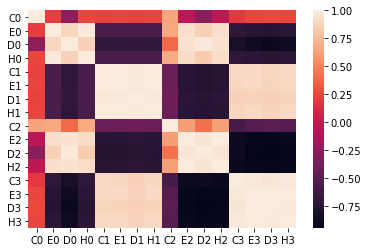

<Figure size 1152x1152 with 0 Axes>

In [60]:
import seaborn as sns
Together.corr()
sns.heatmap(Together.corr())
plt.figure(figsize=(16,16))

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [55]:
clustering=SpectralClustering(n_clusters=3, eigen_solver='arpack', n_components=3, random_state=42, n_init=10, gamma=1, affinity='rbf', eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1, kernel_params=None, n_jobs=None).fit(Together)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:205: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:304: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/pairwise.py:304: RuntimeWarning: invalid value encountered in add
  distances += XX
/usr/local/lib/python3.7/dist-packages/sklearn/utils/extmath.py:151: Runtime

In [54]:
labels=clustering.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)